In [191]:
# Load packages
import json
import time
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

today:
- adjust age
- adjust reviews
- adjust page number

next 
- redo scraping with english and dutch (filtering decreasing popularity)
- boxplot and charts
- change screenshots
- change texts

sentiment analysis

In [183]:
with open('../data/dataset') as f:
  dictionary = json.load(f)

In [184]:
df = pd.DataFrame.from_dict(dictionary)

removing missing values and operationalization of review variable
New variables created:
- number of reviews
- review rate

In [185]:
df = pd.DataFrame.from_dict(dictionary)
df['number of pages (hardcover)'] = df ['number of pages (hardcover)'].apply(lambda x: int(x) if x!= 'no hardcover' else np.NaN)
df['number of pages (paperback)'] = df ['number of pages (paperback)'].apply(lambda x: int(x) if x!= 'no paperback' else np.NaN)
df['purchase options'] = df ['purchase options'].apply(lambda x: int(x) if x!= 'no other options' else np.NaN)
df['review rate'] = df ['reviews'].apply(lambda x: float(x[:3].replace(',','.')) if x!= 'no reviews' else np.NaN)
df['reviews number'] = df ['reviews'].apply(lambda x: int(x[7:9].replace(' ','')) if x!= 'no reviews' else np.NaN)

operationalization of the variable age

In [186]:
# transforming age into years
df['age (years)'] = df ['age'].apply(lambda x:
                             x.replace('0-12 maanden','0.5').
                                     replace('vanaf 3 jaar','3.5').replace('vanaf 2 jaar','2.5').replace('vanaf 1 jaar','1.5').
                                     replace('vanaf 4 jaar','4.5').replace('vanaf 5 jaar','5.5').replace('vanaf 6 jaar','6.5').
                                     replace('vanaf 7 jaar','7.5').replace('vanaf 8 jaar','8.5').replace('vanaf 9 jaar','9.5')
                                     if type(x)== str else np.NaN)
df['age (years)'].value_counts()

3.5                        419
0.5                        327
2.5                        163
1.5                         39
1.5, 2.5, 3.5               31
0.5, 1.5, 3.5               23
3.5, 4.5, 5.5, 6.5          19
3.5, 4.5                    14
0.5, 3.5                     9
0.5, 2.5                     7
0.5, 1.5, 2.5, 3.5           6
2.5, 3.5                     6
1.5, 3.5                     4
3.5, 5.5                     1
1.5, 2.5                     1
2.5, 3.5, 4.5, 5.5, 6.5      1
0.5, 3.5, 5.5                1
0.5, 1.5                     1
0.5, 2.5, 3.5                1
0.5, 3.5, 4.5, 5.5           1
2.5, 4.5, 5.5, 6.5           1
3.5, 7.5, 8.5, 9.5           1
2.5, 3.5, 4.5                1
Name: age (years), dtype: int64

To transform it into an integer the following logic is applied:
- 0 to 1 year corrspond to 0.5
- more than 1 year correspond to 1.5
- more than 2 year correspond to 2.5
- more than 3 year correspond to 3.5, and so on...
- for values containing more age categories an average of them is computed


In [187]:
# defining a function that computes the average of the values separated by commas
def average_of_list(string):
    numbers = list(map(float, string.split(',')))
    average = sum(numbers) / len(numbers)
    return average
# applying the function to age
df['age average'] = df['age (years)'].apply(lambda x: average_of_list(x))

fixing page number :
when paper version price is not available the paperback version's price is employed; and viceversa

In [188]:
i=0
page_number = []
for book in df['number of pages (hardcover)']:
    if  np.isnan(book):
        page_number.append(df['number of pages (paperback)'][i])
        i=i+1
    else:
        page_number.append(df['number of pages (hardcover)'][i])
        i=i+1

df['number of pages'] = page_number
        

In [189]:
df

,title,price ebook,purchase options,number of pages (hardcover),number of pages (paperback),reviews,language,age,review rate,reviews number,age (years),age average,number of pages
0,Kikker en het vogeltje,4.99,3.0,32.0,NaN,"4,7/5 (54 reviews)",Nederlands,vanaf 3 jaar,4.7,54.0,3.5,3.50,32.0
1,Kikker in de kou,4.99,3.0,32.0,NaN,"4,6/5 (14 reviews)",Nederlands,vanaf 3 jaar,4.6,14.0,3.5,3.50,32.0
2,Het grote boek van Saskia en Jeroen,4.99,3.0,224.0,NaN,"4,3/5 (6 reviews)",Nederlands,"vanaf 3 jaar, vanaf 4 jaar, vanaf 5 jaar, vana...",4.3,6.0,"3.5, 4.5, 5.5, 6.5",5.00,224.0
3,Minoes,9.49,5.0,155.0,160.0,"4,8/5 (30 reviews)",Nederlands,"vanaf 3 jaar, vanaf 7 jaar, vanaf 8 jaar, vana...",4.8,30.0,"3.5, 7.5, 8.5, 9.5",7.25,155.0
4,Dikkie Dik - Bundel blauw,2.99,2.0,NaN,NaN,no reviews,Nederlands,"0-12 maanden, vanaf 1 jaar, vanaf 2 jaar, vana...",NaN,NaN,"0.5, 1.5, 2.5, 3.5",2.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,Rooster's Day on the Farm,18.67,NaN,NaN,NaN,no reviews,Engels,0-12 maanden,NaN,NaN,0.5,0.50,NaN
1073,Sassy - Baby Loves Shapes,5.99,NaN,NaN,NaN,no reviews,Engels,0-12 maanden,NaN,NaN,0.5,0.50,NaN
1074,Monday...Super-Fun Day,7.58,NaN,NaN,NaN,no reviews,Engels,vanaf 3 jaar,NaN,NaN,3.5,3.50,NaN
1075,Train!,6.99,3.0,30.0,32.0,no reviews,Engels,"0-12 maanden, vanaf 2 jaar",NaN,NaN,"0.5, 2.5",1.50,30.0


---------------
###### export cleaned dataset

In [190]:
df.to_csv('../gen/cleaned_dataset.csv')

----------
### Visualization

In [194]:
df

,title,price ebook,purchase options,number of pages (hardcover),number of pages (paperback),reviews,language,age,review rate,reviews number,age (years),age average,number of pages
0,Kikker en het vogeltje,4.99,3.0,32.0,NaN,"4,7/5 (54 reviews)",Nederlands,vanaf 3 jaar,4.7,54.0,3.5,3.50,32.0
1,Kikker in de kou,4.99,3.0,32.0,NaN,"4,6/5 (14 reviews)",Nederlands,vanaf 3 jaar,4.6,14.0,3.5,3.50,32.0
2,Het grote boek van Saskia en Jeroen,4.99,3.0,224.0,NaN,"4,3/5 (6 reviews)",Nederlands,"vanaf 3 jaar, vanaf 4 jaar, vanaf 5 jaar, vana...",4.3,6.0,"3.5, 4.5, 5.5, 6.5",5.00,224.0
3,Minoes,9.49,5.0,155.0,160.0,"4,8/5 (30 reviews)",Nederlands,"vanaf 3 jaar, vanaf 7 jaar, vanaf 8 jaar, vana...",4.8,30.0,"3.5, 7.5, 8.5, 9.5",7.25,155.0
4,Dikkie Dik - Bundel blauw,2.99,2.0,NaN,NaN,no reviews,Nederlands,"0-12 maanden, vanaf 1 jaar, vanaf 2 jaar, vana...",NaN,NaN,"0.5, 1.5, 2.5, 3.5",2.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,Rooster's Day on the Farm,18.67,NaN,NaN,NaN,no reviews,Engels,0-12 maanden,NaN,NaN,0.5,0.50,NaN
1073,Sassy - Baby Loves Shapes,5.99,NaN,NaN,NaN,no reviews,Engels,0-12 maanden,NaN,NaN,0.5,0.50,NaN
1074,Monday...Super-Fun Day,7.58,NaN,NaN,NaN,no reviews,Engels,vanaf 3 jaar,NaN,NaN,3.5,3.50,NaN
1075,Train!,6.99,3.0,30.0,32.0,no reviews,Engels,"0-12 maanden, vanaf 2 jaar",NaN,NaN,"0.5, 2.5",1.50,30.0


In [ ]:
# importing data

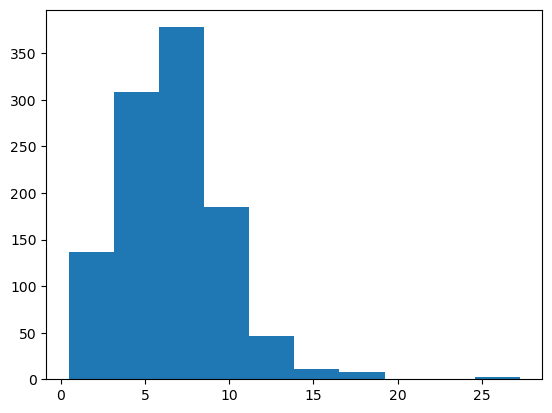

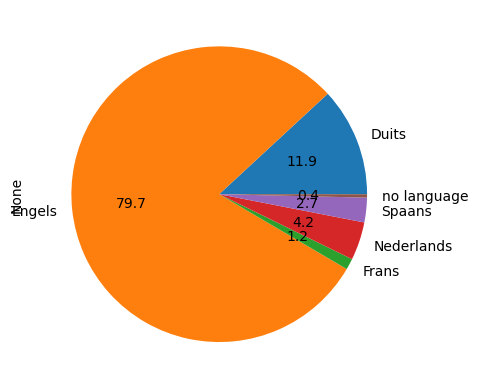

In [199]:
# price distribution
plt.hist(df['price ebook'])
plt.show() 
# languages frequencies
df.groupby('language').size().plot(kind='pie', autopct='%.1f')
plt.show()